# House price polynomial regression

## Import

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from functions import*
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor

## data
#####  Dataset: 
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |

In [2]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

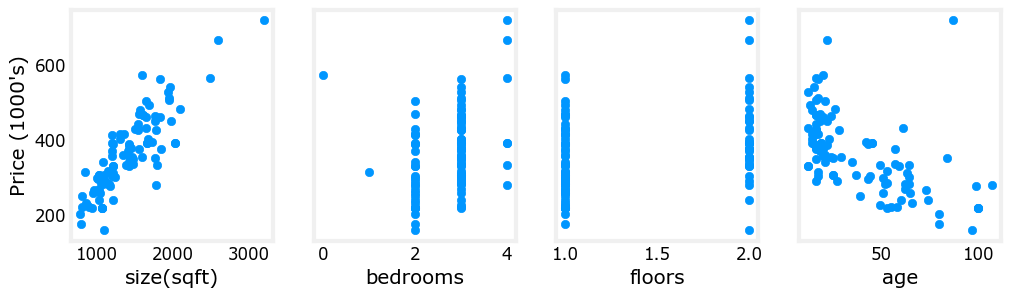

In [3]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

## Model

### create polynomial features

In [16]:
# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X_train)

In [17]:
np.shape(X_poly)

(99, 14)

#### Data scaling/ normalization

In [18]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_poly)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012 6.87619339 6.44885615
 4.59070416 6.76239681 4.80578454 4.1576092  5.87892722 2.05626214
 5.22191525 4.20389816]


#### training the model

In [22]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 346, number of weight updates: 34255.0


#### view parameters

In [24]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 68.06564853 -12.09007724 -11.6222703  -31.34006952  36.21618669
   1.07371775  10.76542071   2.33850535  -2.0417431  -15.06064024
  -3.89588796 -11.6222703   -9.53977834   0.75706065], b:[363.16319464]


## Prediction

In [25]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[292.61221659 488.68065808 382.47935841 495.61769907]
Target values 
[300.  509.8 394.  540. ]


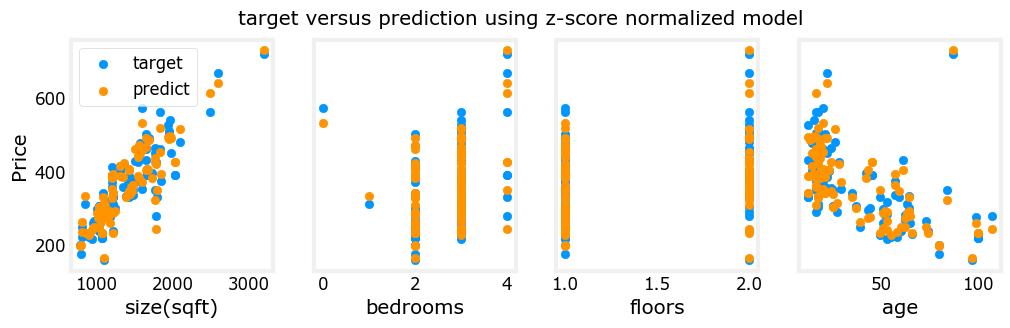

In [26]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()